In [1]:
import numpy as np
from sklearn.metrics import roc_curve
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation


In [2]:
embeddings = np.load("full_embeddings.npy")
labels = np.load("full_labels.npy")


In [3]:
tsne = TSNE()

In [4]:
tsne_vals = tsne.fit_transform(embeddings)

In [5]:
int_label_map = {k:i for i,k in enumerate(np.unique(labels))}

In [6]:
integer_labels = np.array([int_label_map[i] for i in labels])

In [7]:
first_10_labels = (integer_labels < 10)

In [8]:
sidlist = np.array(["14723","17175","17839","24761","28584","31033","38547","41472","48646","50153"])

In [9]:
picked_10 = np.isin(labels,sidlist)

In [10]:
np.sum(picked_10)

309

In [11]:
np.unique(integer_labels[picked_10])

array([ 6,  9, 10, 12, 14, 18, 24, 32, 37, 39])

In [12]:
un_labels = np.unique(integer_labels[picked_10])
rd_labels = integer_labels[picked_10]
disp_labels = np.zeros_like(rd_labels)
for ind,i in enumerate(un_labels):
    disp_labels[rd_labels == i] = ind

In [13]:
np.unique(disp_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [14]:
np_labels = np.array(labels)

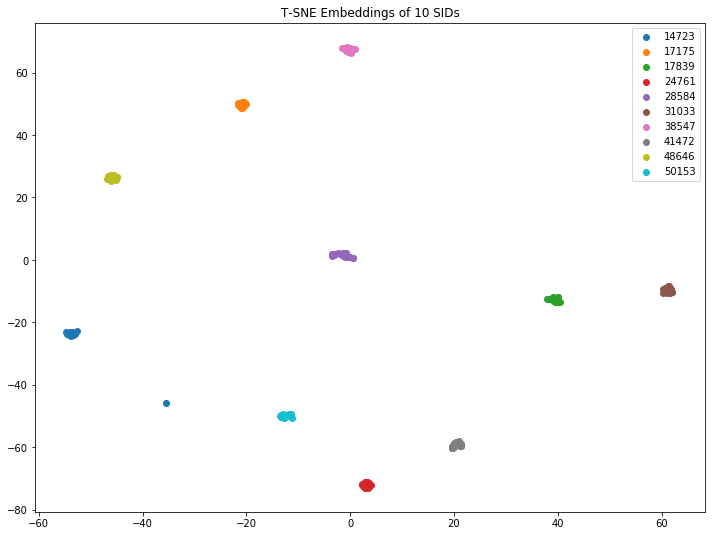

In [15]:
plt.figure(figsize=(12,9))
legend = []
plt.title("T-SNE Embeddings of 10 SIDs")
for ind,i in enumerate(np.unique(sidlist)):
    plt.scatter(tsne_vals[np_labels == i,0],tsne_vals[np_labels == i,1])
    legend.append(i)
plt.legend(legend)
plt.savefig("T-SNE_10_SIDs.PNG")

In [16]:
pca_obj = PCA()

In [17]:
pca_vals = pca_obj.fit_transform(embeddings)

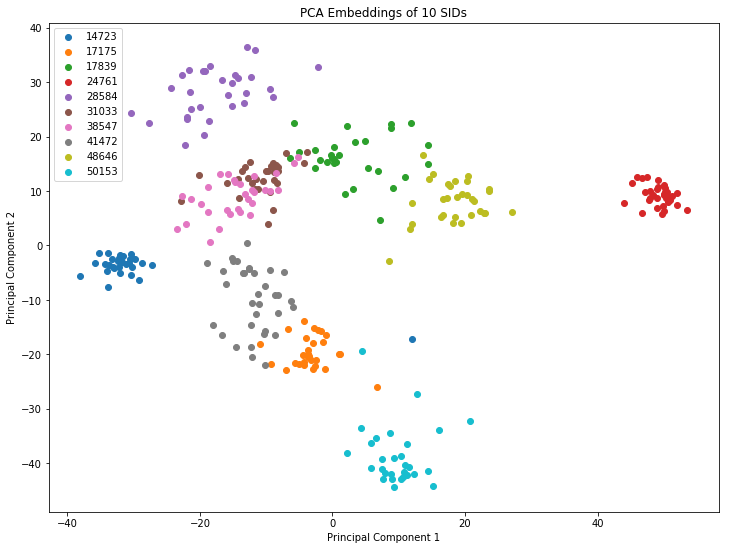

In [18]:
plt.figure(figsize=(12,9))
legend = []
plt.title("PCA Embeddings of 10 SIDs")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for ind,i in enumerate(np.unique(sidlist)):
    plt.scatter(pca_vals[np_labels == i,0],pca_vals[np_labels == i,1])
    legend.append(i)
plt.legend(legend)
plt.savefig("PCA_10SIDs.svg", format="svg")


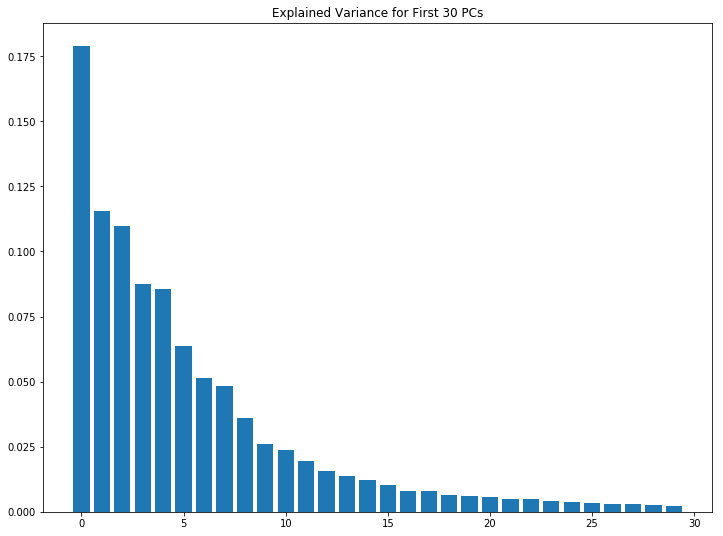

In [19]:
plt.figure(figsize=(12,9))
plt.title("Explained Variance for First 30 PCs")
plt.bar(range(0,30),pca_obj.explained_variance_ratio_[:30])
plt.savefig("PCA_10_SIDs_ExpVar.PNG")

<IPython.core.display.Javascript object>


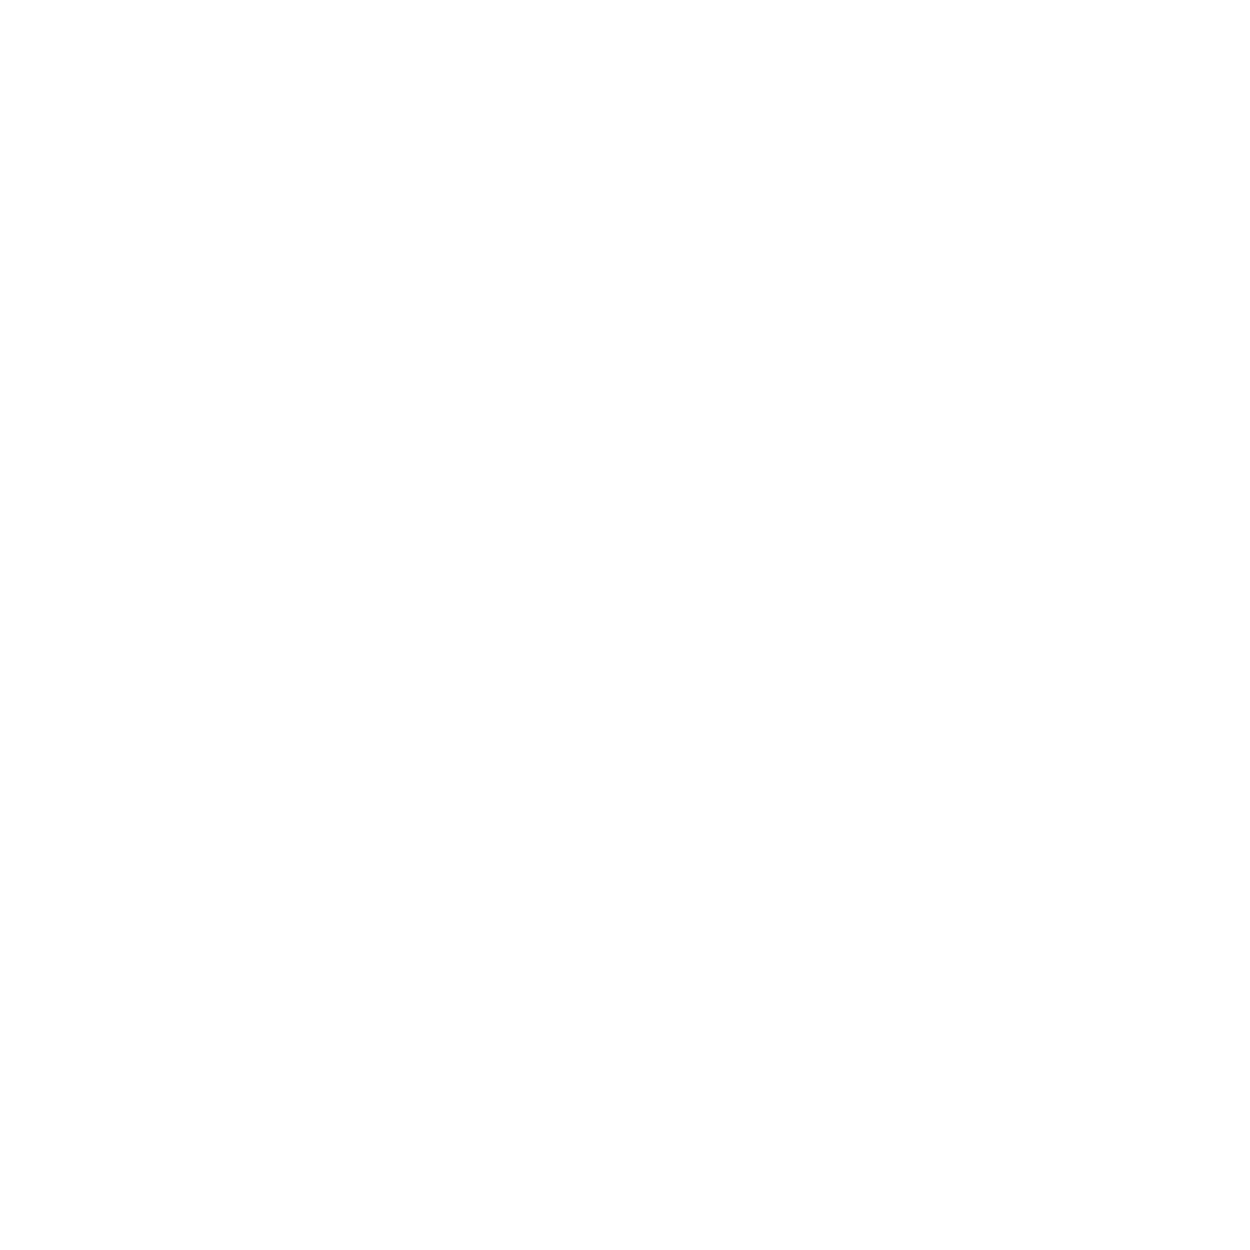

In [20]:
%matplotlib notebook
def rotate(angle):
    ax.view_init(azim=angle)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
plt.title("PCA projection of 10 SIDs")
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
for ind,i in enumerate(np.unique(sidlist)):
    ax.scatter(pca_vals[np_labels == i,0],pca_vals[np_labels == i,1],pca_vals[np_labels == i,2])
    legend.append(i)
plt.legend(legend)
plt.savefig("PCA_10_SIDs_3D.svg", format='svg')
rot_animation = animation.FuncAnimation(fig, rotate, frames=np.arange(0,362,2),interval=40)


In [21]:
from sklearn.neighbors import KNeighborsClassifier
import json

In [25]:
indices = json.load(open("indices_80_20.txt","r"))

In [26]:
train_data = []
train_labels = []
test_data = []
test_labels = []
for sid in np.unique(list(indices.keys())):
    train_data.append(embeddings[indices[sid][0]])
    train_labels.append(labels[indices[sid][0]])
    test_data.append(embeddings[indices[sid][1]])
    test_labels.append(labels[indices[sid][1]])
train_data = np.concatenate(train_data)
train_labels = np.concatenate(train_labels)
test_data = np.concatenate(test_data)
test_labels = np.concatenate(test_labels)

In [27]:
train_data.shape

(2492, 128)

In [28]:
test_data.shape

(595, 128)

In [29]:
knn = KNeighborsClassifier(30)

In [30]:
knn.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [31]:
test_results = knn.predict(test_data)

In [32]:
from sklearn.metrics import classification_report

In [33]:
print(classification_report(test_labels,test_results))

             precision    recall  f1-score   support

      10267       0.86      1.00      0.92         6
      10555       1.00      1.00      1.00         6
      13209       0.86      1.00      0.92         6
      13408       0.86      1.00      0.92         6
      13975       0.56      0.83      0.67         6
      14307       0.86      1.00      0.92         6
      14723       1.00      1.00      1.00         6
      14958       0.83      1.00      0.91         5
      16458       0.86      1.00      0.92         6
      17175       1.00      1.00      1.00         6
      17839       1.00      0.80      0.89         5
      24281       0.75      0.50      0.60         6
      24761       1.00      1.00      1.00         6
      27424       1.00      0.83      0.91         6
      28584       0.86      1.00      0.92         6
      28589       1.00      1.00      1.00         6
      29887       1.00      1.00      1.00         6
      30171       0.80      0.67      0.73   

In [34]:
np.logical

AttributeError: module 'numpy' has no attribute 'logical'

In [35]:
from scipy.spatial.distance import cdist

In [36]:
out = cdist(embeddings, embeddings, 'euclidean')

In [37]:
out.shape

(3087, 3087)

In [38]:
out_2 = out*out

In [39]:
out_2.shape

(3087, 3087)

In [40]:
out_star = out**2

In [41]:
out_star.shape

(3087, 3087)

In [42]:
out_star

array([[   0.        ,  699.47979377,  659.7309217 , ..., 5570.54751937,
        5682.39401527, 5699.5800004 ],
       [ 699.47979377,    0.        ,  154.94849712, ..., 4664.99649043,
        4788.40217782, 4777.0032318 ],
       [ 659.7309217 ,  154.94849712,    0.        , ..., 4764.88817893,
        4887.83038937, 4910.67957131],
       ...,
       [5570.54751937, 4664.99649043, 4764.88817893, ...,    0.        ,
         135.40048114,  211.21161977],
       [5682.39401527, 4788.40217782, 4887.83038937, ...,  135.40048114,
           0.        ,   70.17893153],
       [5699.5800004 , 4777.0032318 , 4910.67957131, ...,  211.21161977,
          70.17893153,    0.        ]])

In [43]:
labels[0]

'10267'

In [44]:
labels = np.array(labels)

In [45]:
same_indices = labels == '10267'

In [46]:
same_indices

array([ True,  True,  True, ..., False, False, False])

In [47]:
same_indices[0] = False

In [48]:
np.mean(out_star[same_indices,0])

862.0971213450714

In [49]:
diff_indices = ~same_indices


In [50]:
diff_indices[0] = False

In [51]:
np.mean(out_star[diff_indices,0])

5213.668963855433

Traceback (most recent call last):
  File "C:\Users\Tish\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 388, in process
    proxy(*args, **kwargs)
  File "C:\Users\Tish\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py", line 228, in __call__
    return mtd(*args, **kwargs)
  File "C:\Users\Tish\Anaconda3\lib\site-packages\matplotlib\animation.py", line 1560, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


ValueError: Colormap sprin_r is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Vega10, Vega10_r, Vega20, Vega20_r, Vega20b, Vega20b_r, Vega20c, Vega20c_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spectral, spectral_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, winter, winter_r

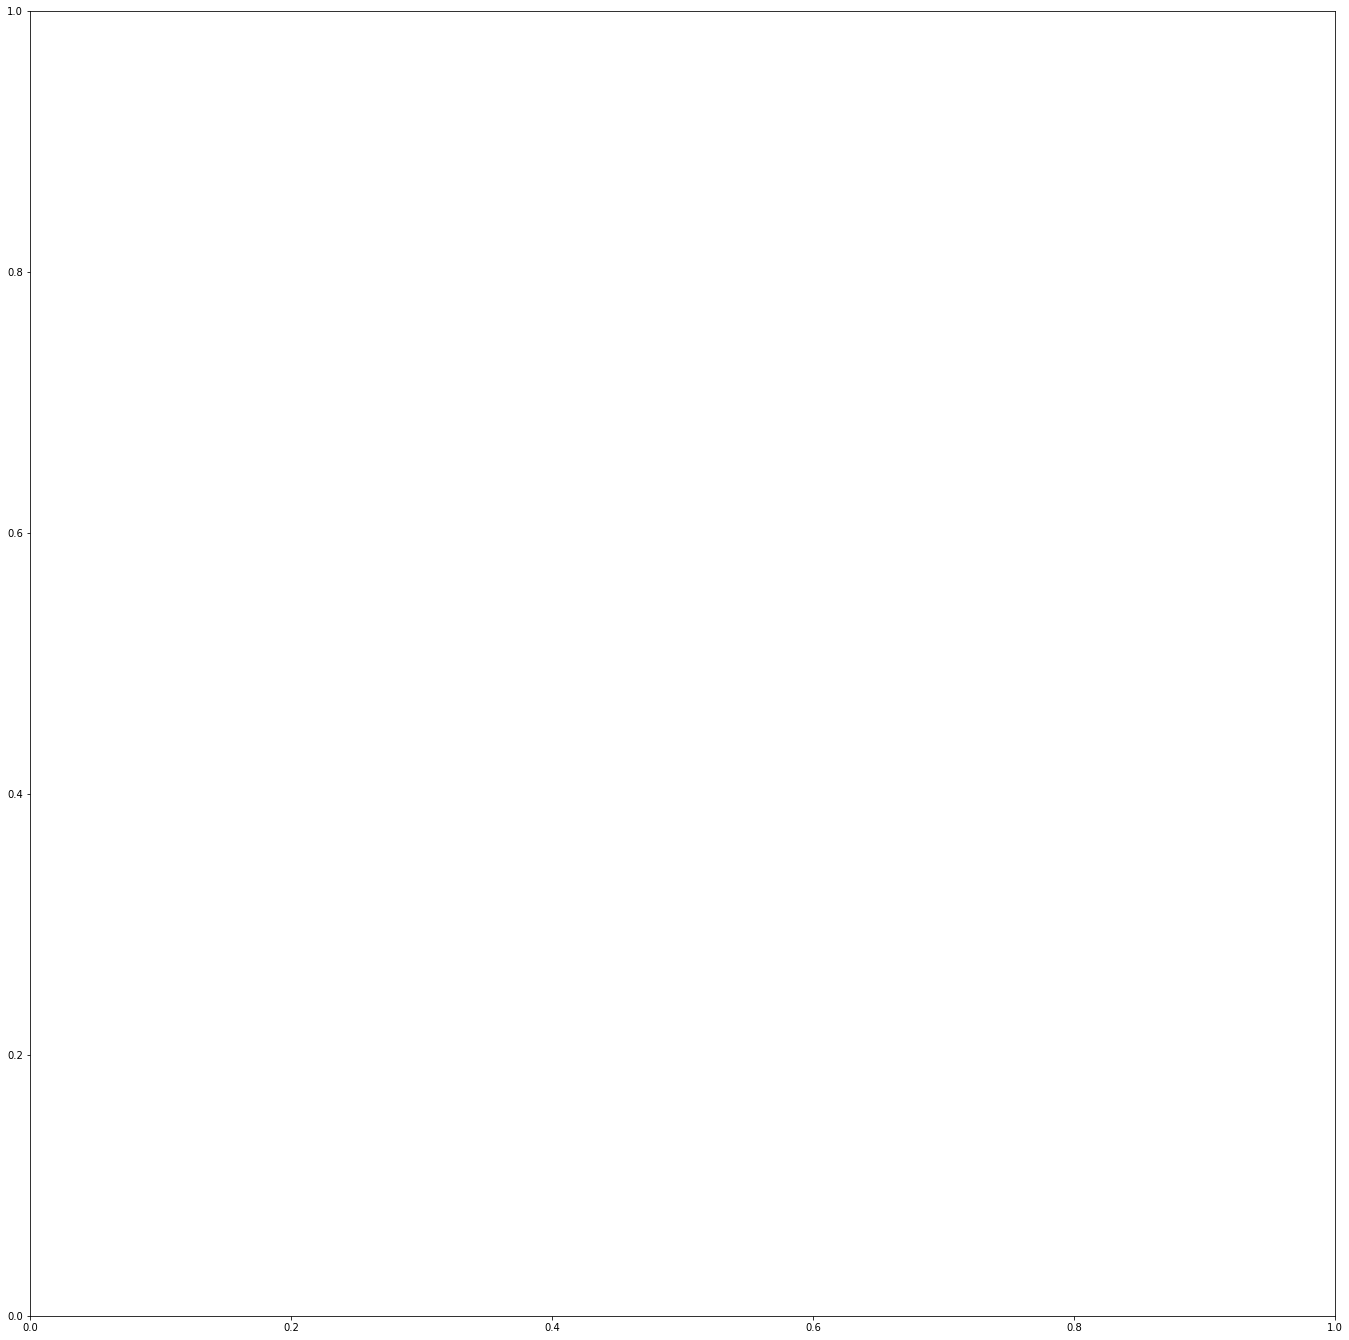

In [52]:
%matplotlib inline 
plt.figure(figsize=(24,24))
plt.imshow(out_star[0:200, 0:200], cmap = 'sprin_r')
plt.colorbar(ticks=range(0,out_star.max().astype(np.int32),500))


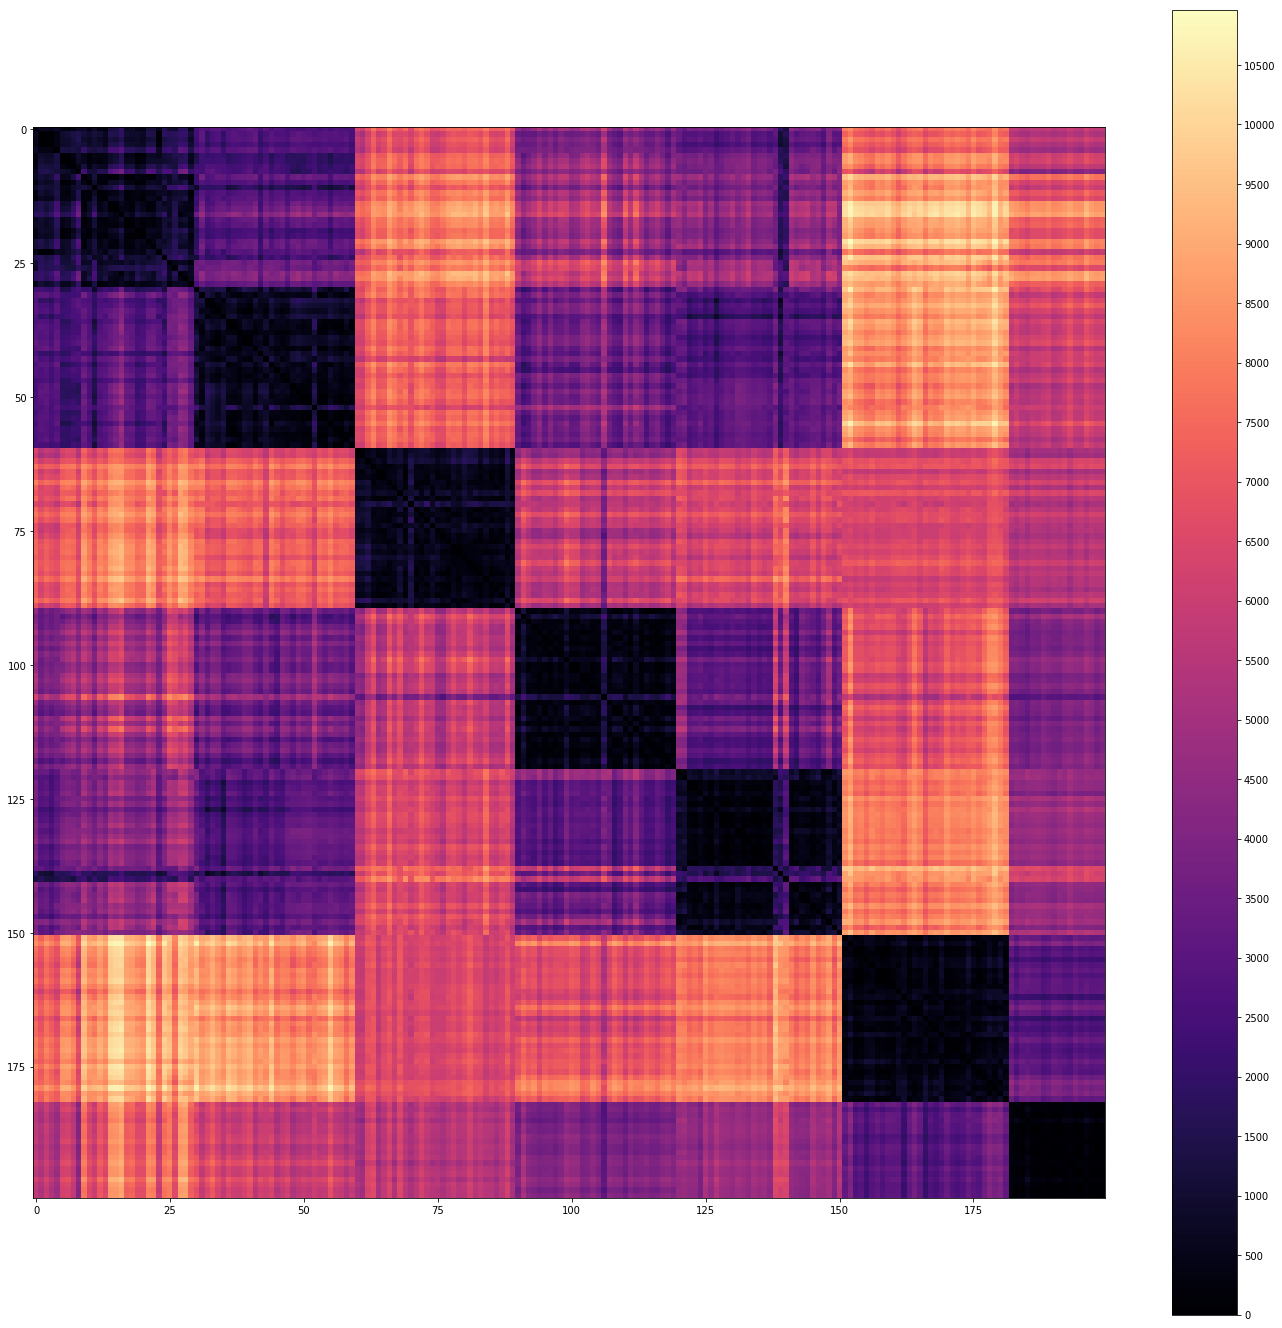

In [53]:
%matplotlib inline 
plt.figure(figsize=(24,24))
plt.imshow(out_star[0:200, 0:200], cmap = 'magma')
plt.colorbar(ticks=range(0,out_star.max().astype(np.int32),500))


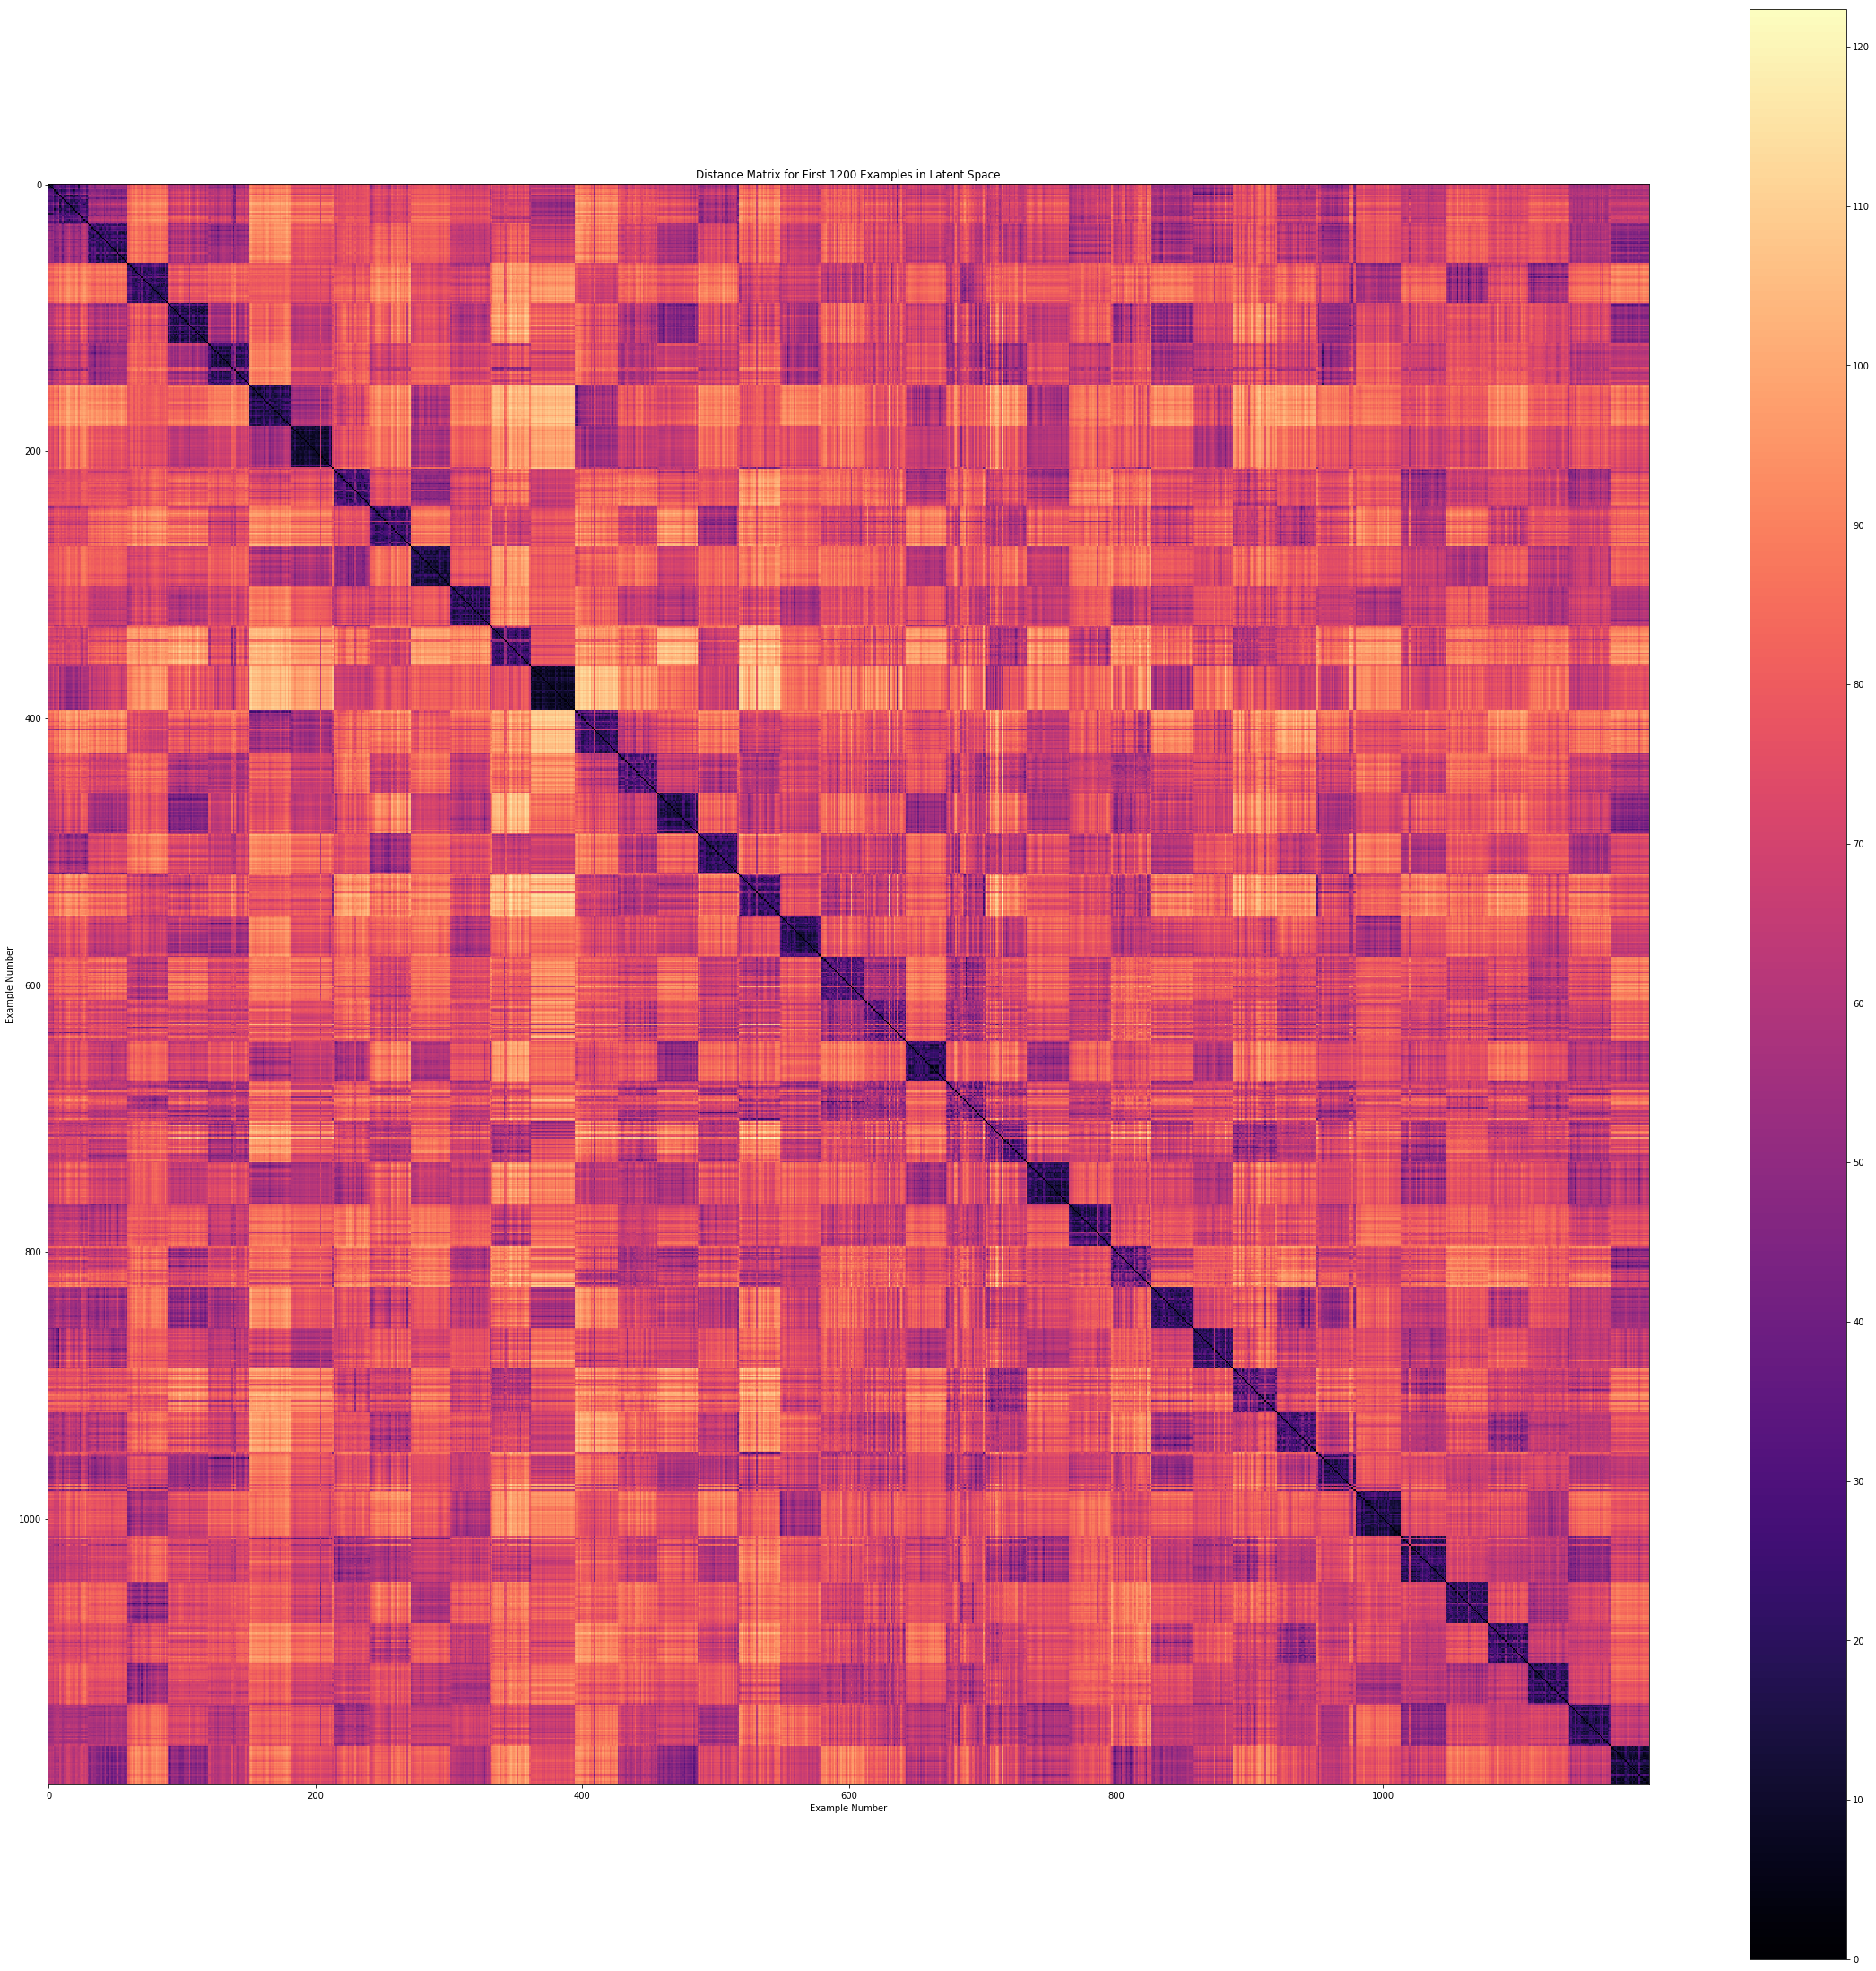

In [54]:
%matplotlib inline 
plt.figure(figsize=(40,40))
plt.title("Distance Matrix for First 1200 Examples in Latent Space")
plt.xlabel('Example Number')
plt.ylabel('Example Number')
plt.imshow(out[0:1200, 0:1200], cmap='magma')
plt.colorbar(ticks=range(0,out.max().astype(np.int32),10))

plt.savefig("distance_mat.svg", format="svg")

In [56]:
np.mean(out[same_indices,0])

28.36855933513813

In [57]:
np.mean(out[diff_indices,0])

71.60572544091455

In [58]:
71.605-28.368

43.23700000000001

In [59]:
normed_embeds = embeddings/np.linalg.norm(embeddings,axis=-1,keepdims=True)

In [60]:
np.sum(normed_embeds[100]**2)

1.0

In [61]:
normed_embeds

array([[0.        , 0.06253469, 0.        , ..., 0.        , 0.        ,
        0.13360584],
       [0.        , 0.07652962, 0.        , ..., 0.        , 0.        ,
        0.11289349],
       [0.        , 0.05605323, 0.        , ..., 0.        , 0.        ,
        0.12266561],
       ...,
       [0.        , 0.1003469 , 0.        , ..., 0.        , 0.        ,
        0.20172483],
       [0.        , 0.07946506, 0.        , ..., 0.        , 0.        ,
        0.19119072],
       [0.        , 0.08905258, 0.        , ..., 0.        , 0.        ,
        0.18160623]], dtype=float32)

In [62]:
out_norm.min()

NameError: name 'out_norm' is not defined

In [63]:
np.mean(out_norm[same_indices,0])

NameError: name 'out_norm' is not defined

In [64]:
np.mean(out_norm[diff_indices,0])

NameError: name 'out_norm' is not defined

In [65]:
out_norm = cdist(normed_embeds, normed_embeds, 'euclidean')**2

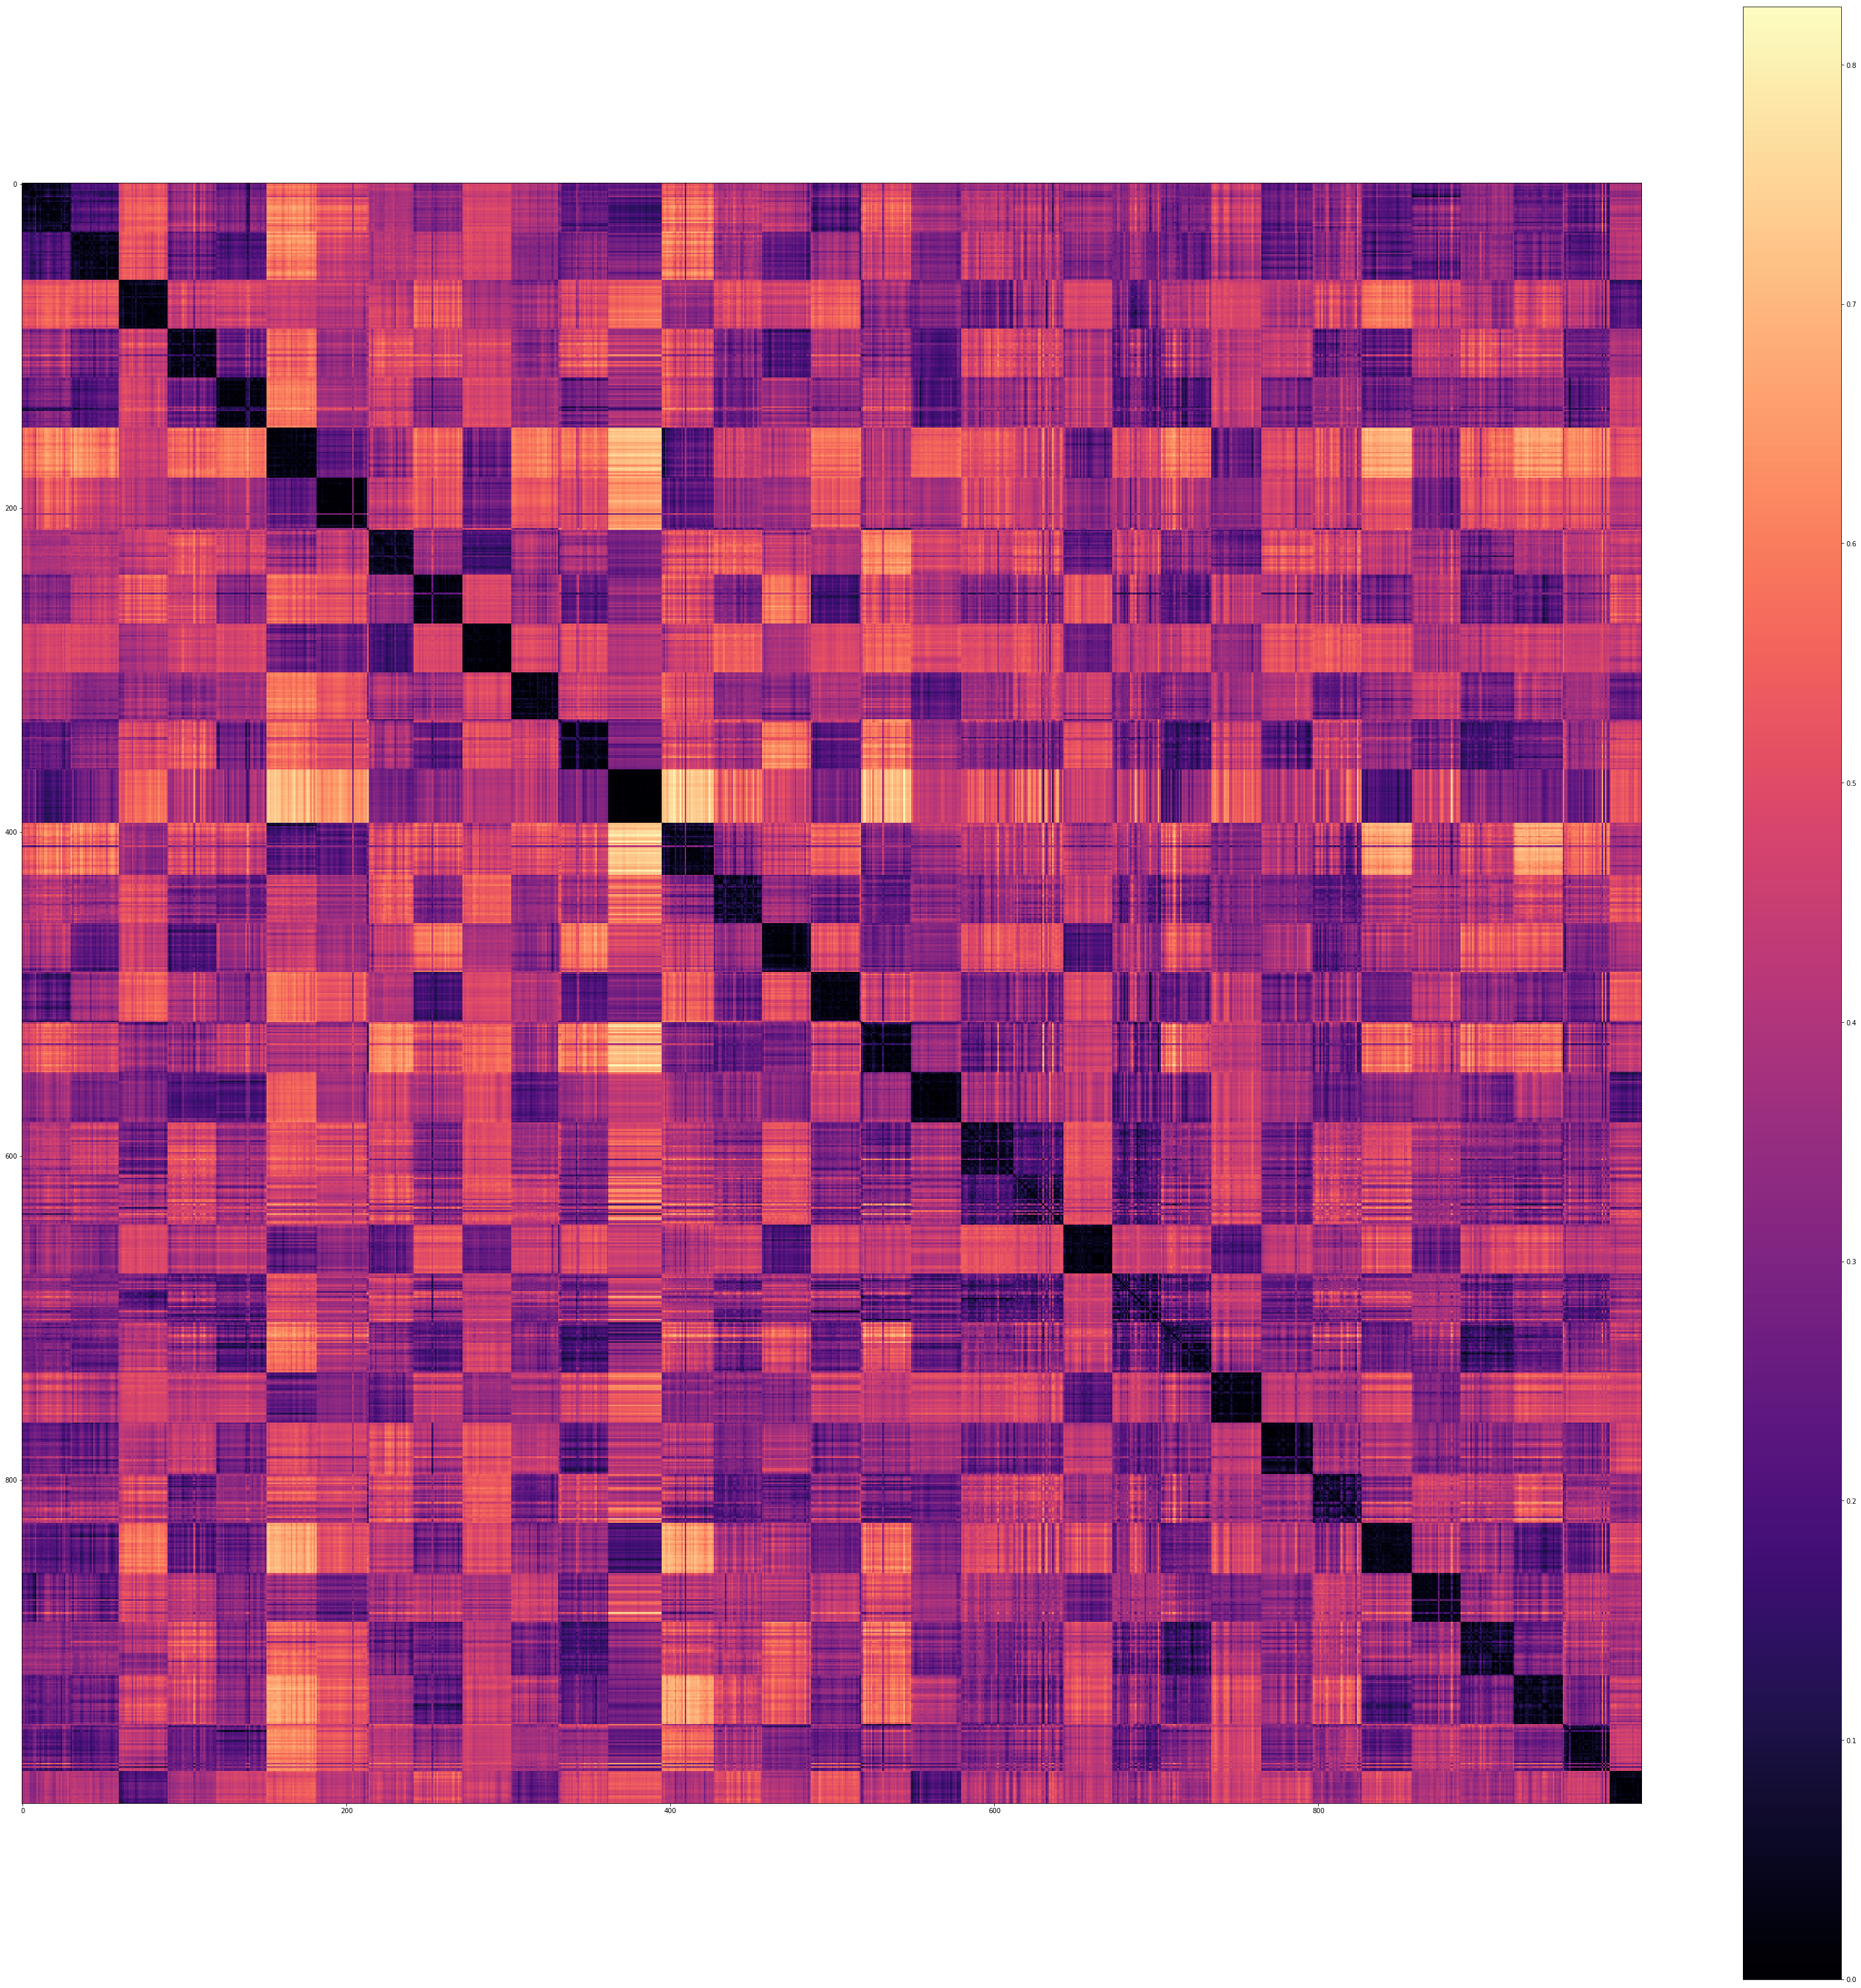

In [66]:
##################### USE THIS #############################

%matplotlib inline 
plt.figure(figsize=(55,55))
#plt.title("L2 Distance Matrix for First 1000 Examples in Latent Space", fontsize=35)
#plt.xlabel('Example Number', fontsize=24)
#plt.ylabel('Example Number', fontsize=24)
plt.imshow(out_norm[0:1000, 0:1000], cmap='magma')
cbar = plt.colorbar(ticks=np.arange(0,out_norm.max(),0.1))
#cbar.set_label('L2 Distance', rotation=270, fontsize=24)
plt.savefig("distance_mat.svg", format="svg")

In [ ]:
out_cosine = cdist(normed_embeds,normed_embeds,lambda x,y: np.dot(x,y))

In [ ]:
%matplotlib inline 
plt.figure(figsize=(24,24))
plt.imshow(1-out_cosine[0:200, 0:200])
plt.colorbar(ticks=np.arange(0,out_cosine.max(),0.1))
plt.show()